In [140]:
from os import walk
import re
from tqdm import tqdm

# Dataset - https://www.kaggle.com/datasets/d0rj3228/russian-literature
DATA_PATH = 'd:/Downloads/Russian texts database/prose/'
MAX_DATA_SIZE = 1 * 10**6

data_text = ''
for dirpath, dirnames, filenames in walk(DATA_PATH):
    for file_name in filenames:
        if file_name[-4:] != '.txt': continue

        print('Read:', file_name)
        current_text = open(dirpath + '/' + file_name, 'r', encoding='utf-8').read()
        data_text += current_text

def prepare_text(text):
    n_text = text.lower()
    n_text = re.sub(r'\n+', '', n_text)
    n_text = re.sub(r'\s+', ' ', n_text)

    return n_text

print('---')

data_text = prepare_text(data_text)
DATA_TEXT = data_text[:MAX_DATA_SIZE]
DATA_SIZE = len(DATA_TEXT)

ALPHABET = list(set(DATA_TEXT))
ALPHABET.sort()
VOCAB_SIZE = len(ALPHABET)
LETTER_INDEX = {ALPHABET[i]: i for i in range(VOCAB_SIZE)}

print('Whole text size:', len(data_text), 'so used', DATA_SIZE)
print('Alphabet length:', VOCAB_SIZE)
print('Alphabet:', ''.join(ALPHABET))

Read: ╨б╨║╨░╨╖╨║╨░ ╨╛ ╤В╨╛╨╣, ╨║╨╛╤В╨╛╤А╨░╤П ╨╜╨╡ ╨┐╨╛╨╣╨╝╨╡╤В ╨╡╤С.txt
Read: ╨б╨╛╨│╤А╨░╨╢╨┤╨░╨╜╨╡.txt
Read: ╨Ф╨╡╨▓╤Г╤И╨║╨░ ╤А╨╛╨╖╨╛╨▓╨╛╨╣ ╨║╨░╨╗╨╕╤В╨║╨╕ ╨╕ ╨╝╤Г╤А╨░╨▓╤М╨╕╨╜╤Л╨╣ ╤Ж╨░╤А╤М.txt
Read: ╨Э╨╕ ╤Б╨╜╤Л, ╨╜╨╕ ╤П╨▓╤М.txt
Read: ╨а╨╡╤Б╨┐╤Г╨▒╨╗╨╕╨║╨░ ╨о╨╢╨╜╨╛╨│╨╛ ╨Ъ╤А╨╡╤Б╤В╨░.txt
Read: ╨а╨╡╤П ╨б╨╕╨╗╤М╨▓╨╕╤П.txt
Read: ╨а╨░╤Б╤Б╨║╨░╨╖╤Л ╨Ь╨░╤И╨╕, ╤Б ╤А╨╡╨║╨╕ ╨Ь╨╛╨╗╨╛╨│╨╕, ╨┐╨╛╨┤ ╨│╨╛╤А╨╛╨┤╨╛╨╝ ╨г╤Б╤В╤О╨╢╨╜╨░.txt
Read: ╨б╨╡╤Б╤В╤А╤Л.txt
Read: ╨б╨╡╨╝╤М ╨╖╨╡╨╝╨╜╤Л╤Е ╤Б╨╛╨▒╨╗╨░╨╖╨╜╨╛╨▓.txt
Read: ╨в╨╡╨┐╨╡╤А╤М, - ╨║╨╛╨│╨┤╨░ ╤П ╨┐╤А╨╛╤Б╨╜╤Г╨╗╤Б╤П....txt
Read: ╨з╨╡╤А╨╡╨╖ ╨┐╤П╤В╨╜╨░╨┤╤Ж╨░╤В╤М ╨╗╨╡╤В.txt
Read: ╨н╨╗╤Г╨╗╨╕, ╤Б╤Л╨╜ ╨н╨╗╤Г╨╗╨╕.txt
Read: ╨о╨┐╨╕╤В╨╡╤А ╨┐╨╛╨▓╨╡╤А╨╢╨╡╨╜╨╜╤Л╨╣.txt
Read: ╨Р╨╗╤В╨░╤А╤М ╨┐╨╛╨▒╨╡╨┤╤Л.txt
Read: ╨С╨╡╨╝╨╛╨╗╤М.txt
Read: ╨Т ╨┐╨╛╨┤╨╖╨╡╨╝╨╜╨╛╨╣ ╤В╤О╤А╤М╨╝╨╡.txt
Read: ╨Т ╨╖╨╡╤А╨║╨░╨╗╨╡.txt
Read: ╨Т ╨▒╨░╤И╨╜╨╡.txt
Read: ╨Т╨╛╤Б╤Б╤В╨░╨╜╨╕╨╡ ╨╝╨░╤И╨╕╨╜.txt
Read: ╨У╨╛╤А╨░ ╨Ч╨▓╨╡╨╖╨┤╤Л.txt
Read: ╨Ф╨╕╤В╤П ╨╕ ╨▒╨╡╨╖╤Г╨╝╨╡╤Ж.txt
Read: ╨Ф╨╡╨║╨░╨┤╨╡╨╜╤В.txt
Read: ╨Ч╨░ ╤Б╨╡╨▒╤П ╨╕

In [141]:
import numpy as np

def match_to_letters(prediction):
    return {ALPHABET[i]: prediction[i] for i in range(VOCAB_SIZE)}

def letter_of_pred(prediction) -> str:
    return ALPHABET[prediction.argmax()]


class LetterCounter:
    def __init__(self):
        self.counter = np.zeros((VOCAB_SIZE, VOCAB_SIZE), dtype=np.int32)

    def correlate(self, prev, next):
        prev_ind = LETTER_INDEX[prev]
        next_ind = LETTER_INDEX[next]

        self.counter[prev_ind][next_ind] += 1
    
    def predict_raw(self, prev):
        prev_ind = LETTER_INDEX[prev]
        return self.counter[prev_ind]
    
    def predict_unif(self, prev):
        preds = self.predict_raw(prev)
        total = preds.sum()
        return preds / total
    
    def predict_next(self, prev):
        return letter_of_pred(self.predict_raw(prev))

    def get_rate(self, prev, next):
        return self.counter[LETTER_INDEX[prev]][LETTER_INDEX[next]]


class SimpleModel(LetterCounter):
    def __init__(self, frag_len):
        super().__init__()
        self.frag_len = frag_len
        self.counters = [LetterCounter() for _ in range(frag_len)]

    def correlate(self, prev_frag, next):
        next_ind = LETTER_INDEX[next]

        for i in range(self.frag_len):
            prev_ind = LETTER_INDEX[prev_frag[i]]
            self.counters[i].counter[prev_ind][next_ind] += 1
            self.counter[prev_ind][next_ind] += 1

    def predict_raw(self, prev_frag):
        defect = 0
        #defect = self.frag_len - len(prev_frag)
        #prev_frag = ' '*defect + prev_frag

        preds = np.zeros(VOCAB_SIZE)
        
        for i in range(defect, self.frag_len):
            preds += self.counters[i].predict_raw(prev_frag[i])

        return preds


FRAGMENT_LEN = 10
simple_model = SimpleModel(FRAGMENT_LEN)

for i in tqdm(range(FRAGMENT_LEN, DATA_SIZE)):
    simple_model.correlate(DATA_TEXT[i-FRAGMENT_LEN : i], DATA_TEXT[i])


  0%|          | 3763/999990 [00:00<00:26, 37380.94it/s]

100%|██████████| 999990/999990 [00:13<00:00, 72211.28it/s]


In [142]:
import pandas as pd
import json

# Saving data

#json.dump(simple_model.counter, open('correlation data.json', 'w'))

df = pd.DataFrame(simple_model.counter, index=ALPHABET, columns=ALPHABET)
df.to_csv('correlation data.csv', sep='\t')

# so df.loc['а', 'в'] == df['в', 'а'] == DATA_TEXT.count('ав') == simple_model.counter['в']['а'] == 99253

In [143]:
#import pandas as pd
#import json
#
#f = open('correlation data.json')
#json_data = json.load(f)
#f.close()
#
#df = pd.read_csv('correlation data.csv', sep='\t', index_col=0)

In [144]:
need_alph = list(' абвгдеёжзийклмнопрстуфхцчшщъыьэюя.,!?-')

#data = df.loc[need_alph, need_alph]
data = df.loc[:, :]

data.loc[need_alph, need_alph].head()

,,а,б,в,г,д,е,ё,ж,з,...,ы,ь,э,ю,я,.,",",!,?,-
,198207,95028,28642,61775,24912,43708,116045,8,14909,23337,...,25289,18272,3836,8479,27968,9411,24928,964,639,9044
а,100114,34645,8337,21373,7617,13633,37859,2,4874,9098,...,9044,11035,1021,3642,13144,5739,14976,446,330,3448
б,21011,8475,1650,4951,2188,3811,11452,2,1357,2273,...,5773,2858,212,899,3073,1237,3014,148,106,509
в,54492,21353,4228,10739,4891,8543,30206,3,2440,4391,...,6015,5727,721,2201,6966,3081,7399,237,164,1236
г,22323,9869,2054,4911,1655,5044,8957,3,902,1642,...,1892,1375,188,576,2658,1504,3472,135,103,778


In [145]:
print("Probability of the next one after the previous one")
next_to_prev = data.div(data.sum(axis=1), axis=0)
next_to_prev = next_to_prev.apply(lambda x: round(x*100, 2))
next_to_prev.loc[need_alph, need_alph].head()

Probability of the next one after the previous one


,,а,б,в,г,д,е,ё,ж,з,...,ы,ь,э,ю,я,.,",",!,?,-
,12.62,6.05,1.82,3.93,1.59,2.78,7.39,0.0,0.95,1.49,...,1.61,1.16,0.24,0.54,1.78,0.60,1.59,0.06,0.04,0.58
а,16.65,5.76,1.39,3.55,1.27,2.27,6.30,0.0,0.81,1.51,...,1.50,1.84,0.17,0.61,2.19,0.95,2.49,0.07,0.05,0.57
б,14.10,5.69,1.11,3.32,1.47,2.56,7.69,0.0,0.91,1.53,...,3.87,1.92,0.14,0.60,2.06,0.83,2.02,0.10,0.07,0.34
в,15.22,5.96,1.18,3.00,1.37,2.39,8.43,0.0,0.68,1.23,...,1.68,1.60,0.20,0.61,1.95,0.86,2.07,0.07,0.05,0.35
г,15.51,6.86,1.43,3.41,1.15,3.50,6.22,0.0,0.63,1.14,...,1.31,0.96,0.13,0.40,1.85,1.04,2.41,0.09,0.07,0.54


C:\Users\CA81~1\AppData\Local\Temp/ipykernel_1196/1628655845.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


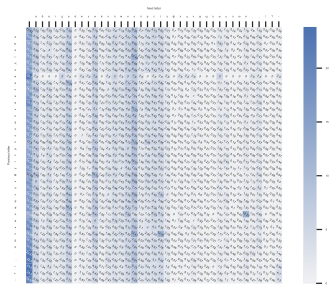

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

sns.set_context('notebook')
sns.set_style("ticks")

sns.set(font_scale=0.25)

ax = sns.heatmap(next_to_prev.loc[need_alph, need_alph],
                 annot=True, fmt='g', annot_kws={'rotation': -30},
                 square=True, xticklabels=True, yticklabels=True,
                 cmap=sns.color_palette("light:b", as_cmap=True))

ax.xaxis.tick_top()
ax.set(ylabel="Previous letter")
ax.set_title("Next letter")
plt.tight_layout()
plt.show()

In [147]:
letters_predicted = 0
predictability = 0
n = 100_000
#n = DATA_SIZE

for i in tqdm(range(FRAGMENT_LEN, n)):
    text_fragment = DATA_TEXT[i-FRAGMENT_LEN : i]

    predictability += match_to_letters(simple_model.predict_unif(text_fragment))[DATA_TEXT[i]]
    letters_predicted += 1 if simple_model.predict_next(text_fragment) == DATA_TEXT[i] else 0

predictability /= n - FRAGMENT_LEN
letters_predicted /= n - FRAGMENT_LEN
print('Predicted ', round(letters_predicted*100, 2), '% of letters')
print('Predictability of russian language is', round(predictability*100, 2), '%')
    

100%|██████████| 99990/99990 [00:09<00:00, 10048.63it/s]

Predicted  14.75 % of letters
Predictability of russian language is 6.69 %


In [148]:
#test_text = 'приветики, съешь ещё этих мягких французских булочек да выпей чаю'
#test_text = 'и снова седая ночь, и только ей доверяю я, знаешь седая ночь что-то та-а-ам'
#test_text = 'мне нужно это предложение, чтобы протестировать некий анализ йей!'
#test_text = prepare_text("Если посмотреть из чего получается оригинальная мысль, то можем выделить следующие факторы: личные ценности, культурный опыт, перспектива и взгляд на мир, эмоциональные и интуитивные компоненты. Из этого и складывается индивидуальность творца-человека. ИИ не обладает эмоциями. Но что из этого не может быть имитировано? Он не может обладать ничем из перечисленного, ведь это все присуще живым и мыслящим существам, а ИИ не живой; однако он может все это впитать и воссоздать в себе. Эти факторы – следствие всего пережитого, всего накопленного и отпечатанного опыта. А впитывать опыт – то, что ИИ и делают и способны делать это лучше нас и в гораздо большем объеме, чем способны люди, ведь ИИ не органичен физиологическими факторами.")
test_text = prepare_text("Если посмотреть из чего получается оригинальная мысль, то можем выделить следующие факторы: личные ценности, культурный опыт, перспектива и взгляд на мир, эмоциональные и интуитивные компоненты. Из этого и складывается индивидуальность творца-человека. ИИ не обладает эмоциями. Но что из этого не может быть имитировано? Он не может обладать ничем из перечисленного, ведь это все присуще живым и мыслящим существам, а ИИ не живой; однако он может все это впитать и воссоздать в себе. Эти факторы - следствие всего пережитого, всего накопленного и отпечатанного опыта. А впитывать опыт - то, что ИИ и делают и способны делать это лучше нас и в гораздо большем объеме, чем способны люди, ведь ИИ не органичен физиологическими факторами.")

r = test_text[:FRAGMENT_LEN]
for i in range(FRAGMENT_LEN, len(test_text)):
    #if match_to_letters(simple_model.predict_unif(test_text[i-FRAGMENT_LEN : i]))[test_text[i]] > 0.09 and test_text[i] != ' ':
    if match_to_letters(simple_model.predict_unif(r[-FRAGMENT_LEN:]))[test_text[i]] > 0.07 and test_text[i] != ' ':
    #if simple_model.predict_next(test_text[i-FRAGMENT_LEN : i]) == test_text[i] and test_text[i] != ' ':
    #if simple_model.predict_next(r[-FRAGMENT_LEN:]) == test_text[i] and test_text[i] != ' ':
        r += ''
    else:
        r += test_text[i]

print(r)
print('Original length:', len(test_text))
print('Compressed length:', len(r))
print('Compression:', len(r) / len(test_text))

если посмотрть из чг плучается ригинльня мысль, т мжм выдлить слдующие фктры: личны цннсти, культурный пыт, прспктива  взгляд н мир, эмцинльны и интуитивные кмпннты. из этг и складывается индивидуальнсть тврца-члвк. ии н бладает эмциями. н чт из этг н мжт быть имитирван? н н мжт бладть ничм из прчислннг, вдь эт вс присущ живым и мыслящим сущсвм, а ии н живй; днак н мжт вс эт впитать и вссздть в сб. эти фктры - слдствие всг пржитг, всг нкплннг и тпчатаннг пыт. а впитывать пыт - т, чт ии и длают и спсбны длать эт лучш нс и в гразд бльшм бъем, чм спсбны люди, вдь ии н рганчн физилгичскими фктрми.
Original length: 734
Compressed length: 600
Compression: 0.22333333333333338


### Trying machine learning

In [162]:
# input_len = FRAGMENT_LEN
input_len = 15

data_size = MAX_DATA_SIZE - input_len
print('Train data size:', data_size)

X = np.zeros((data_size, input_len), dtype=np.float64)
Y = np.zeros((data_size, VOCAB_SIZE), dtype=np.int8)


def text_to_indexes(text):
    return np.array([LETTER_INDEX[s] for s in text])


for i in tqdm(range(input_len, MAX_DATA_SIZE)):
    fragment = DATA_TEXT[i-input_len : i]
    X[i-input_len] = text_to_indexes(fragment)
    
    letter_ind = LETTER_INDEX[DATA_TEXT[i]]
    Y[i-input_len][letter_ind] = 1
    
print('X shape:', X.shape)
print('Y shape:', Y.shape)

print(X)
print(Y)

Train data size: 999985


100%|██████████| 999985/999985 [00:08<00:00, 120652.20it/s]

X shape: (999985, 15)
Y shape: (999985, 92)
[[74. 67. 57. ...  7.  0. 67.]
 [67. 57. 64. ...  0. 67. 71.]
 [57. 64. 67. ... 67. 71. 75.]
 ...
 [65. 67. 57. ... 61.  7.  0.]
 [67. 57. 67. ...  7.  0. 59.]
 [57. 67. 65. ...  0. 59. 74.]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [167]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten

import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

batch_size = 64
dropout_val = 0.3
embending_size = 256

model = Sequential([
    Embedding(VOCAB_SIZE, embending_size, input_length=input_len),
    #Dropout(dropout_val),

    Flatten(),

    Dense(128, activation='relu'),
    #Dropout(dropout_val),

    Dense(VOCAB_SIZE, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X, Y, epochs=1, validation_split=0.2, batch_size=batch_size)

model.save('LP')

Num GPUs Available:  1
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 15, 256)           23552     
                                                                 
 flatten_18 (Flatten)        (None, 3840)              0         
                                                                 
 dense_24 (Dense)            (None, 128)               491648    
                                                                 
 dense_25 (Dense)            (None, 92)                11868     
                                                                 
Total params: 527,068
Trainable params: 527,068
Non-trainable params: 0
_________________________________________________________________
12500/12500 [==============================] - 117s 9ms/step - loss: 2.1288 - accuracy: 0.3646 - val_loss: 1.9566 - val_accuracy: 0.4027
INFO:tensorflow:Ass

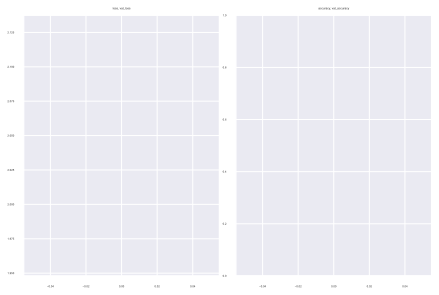

In [168]:
fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title("loss, val_loss")

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].set_title("accuracy, val_accuracy")
axs[1].set_ylim([0, 1])

plt.show()

In [169]:
letters_predicted = 0
predictability = 0
n = 100_000
#n = DATA_SIZE

predictions = model.predict(X[:n])

for i in tqdm(range(n)):
    prediction = predictions[i]
    next_letter = DATA_TEXT[i + input_len]

    predictability += match_to_letters(prediction)[next_letter]
    letters_predicted += 1 if letter_of_pred(prediction) == next_letter else 0

predictability /= n - input_len
letters_predicted /= n - input_len
print('Predicted ', round(letters_predicted*100, 2), '% of letters')
print('Predictability of russian language is', round(predictability*100, 2), '%')

3125/3125 [==============================] - 11s 4ms/step


100%|██████████| 100000/100000 [00:02<00:00, 48084.57it/s]

Predicted  38.55 % of letters
Predictability of russian language is 26.77 %


In [171]:
#test_text = 'приветики, съешь ещё этих мягких французских булочек да выпей чаю'
#test_text = 'и снова седая ночь, и только ей доверяю я, знаешь седая ночь что-то та-а-ам'
#test_text = 'мне нужно это предложение, чтобы протестировать некий анализ йей!'
#test_text = prepare_text("Если посмотреть из чего получается оригинальная мысль, то можем выделить следующие факторы: личные ценности, культурный опыт, перспектива и взгляд на мир, эмоциональные и интуитивные компоненты. Из этого и складывается индивидуальность творца-человека. ИИ не обладает эмоциями. Но что из этого не может быть имитировано? Он не может обладать ничем из перечисленного, ведь это все присуще живым и мыслящим существам, а ИИ не живой; однако он может все это впитать и воссоздать в себе. Эти факторы – следствие всего пережитого, всего накопленного и отпечатанного опыта. А впитывать опыт – то, что ИИ и делают и способны делать это лучше нас и в гораздо большем объеме, чем способны люди, ведь ИИ не органичен физиологическими факторами.")
test_text = prepare_text("Если посмотреть из чего получается оригинальная мысль, то можем выделить следующие факторы: личные ценности, культурный опыт, перспектива и взгляд на мир, эмоциональные и интуитивные компоненты. Из этого и складывается индивидуальность творца-человека. ИИ не обладает эмоциями. Но что из этого не может быть имитировано? Он не может обладать ничем из перечисленного, ведь это все присуще живым и мыслящим существам, а ИИ не живой; однако он может все это впитать и воссоздать в себе. Эти факторы - следствие всего пережитого, всего накопленного и отпечатанного опыта. А впитывать опыт - то, что ИИ и делают и способны делать это лучше нас и в гораздо большем объеме, чем способны люди, ведь ИИ не органичен физиологическими факторами.")

r = test_text[:input_len]

for i in tqdm(range(input_len, len(test_text))):
    #frag = test_text[i-input_len : i]
    fragment = r[-input_len:]
    fragment = text_to_indexes(fragment)
    prediction = model.predict(np.array([fragment]), verbose=0)[0]

    if match_to_letters(prediction)[test_text[i]] > 0.10 and test_text[i] != ' ':
    #if letter_of_pred(prediction) == test_text[i] and test_text[i] != ' ':
        r += ''
    else:
        r += test_text[i]

print(r)
print('Original length:', len(test_text))
print('Compressed length:', len(r))
print('Compression:', len(r) / len(test_text))

100%|██████████| 719/719 [00:45<00:00, 15.95it/s]

если посмотреть из чг плуаеся оргиальая мсль, т мжм вдлть слдющ фатры: лчны цннси, культрнй опы, ерспктиа  взгяд н ми, эмциоалн и интуитивне кмпннт. и эог и склдыаетя индвдуаьнсь трц-члвек. ии н оладт эмциям. о чо и эоо н мжт бть имтиовн? о н мжт обадть ничм из пеечслеог, вдь эо се писущ жиы и мысящм ущсвам, а ии н жиой; одак о мжт е эо впитть и ооздть в сб. эи фаты - слесвие вг пееиог, всг нкплннг и опечтанг опыа. а пиывть опы - т, чо ии и длаю и спсобны длат эо луе нс и  газо бльшм оъем, е ообны лди, едь ии н оргнич физиоогчскм фактрм.
Original length: 734
Compressed length: 543
Compression: 0.7397820163487738
